In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle('data.pkl.xz', compression="infer")

In [3]:
df.head()

,architectures,categories,certification_status,created_at,filter_type,id,name,operating_systems,popularity,publisher,pull_count,short_description,slug,source,star_count,type,updated_at
0,x86-64,"Storage, Application Frameworks",False,2016-06-16 00:00:00+00:00,official,,couchbase,Linux,0,Docker,10M+,Couchbase Server is a NoSQL document database ...,couchbase,store,392,image,2019-04-04 05:05:57.499476
1,"ARM, x86-64, IBM Z, PowerPC 64 LE, 386, ARM 64",Base Images,False,2016-06-01 23:29:38.220032+00:00,official,,busybox,Linux,0,Docker,10M+,Busybox base image.,busybox,store,1543,image,2019-04-04 05:04:56.931440
2,"PowerPC 64 LE, 386, ARM 64, ARM, x86-64, IBM Z","Featured Images, Base Images, Operating Systems",False,2016-06-03 16:38:49.371406+00:00,official,,alpine,Linux,0,Docker,10M+,A minimal Docker image based on Alpine Linux w...,alpine,store,5139,image,2019-04-04 05:04:59.976025
3,x86-64,"Security, Application Infrastructure",True,2017-12-15 12:58:29.001814+00:00,store,,IBM Security Access Manager,Linux,0,IBM,NaN,IBM Security Access Manager deploys a simplifi...,ibm-security-access-manager,store,0,image,2018-12-03 21:26:32.015335
4,"ARM, x86-64, IBM Z, PowerPC 64 LE, 386, ARM 64",Application Infrastructure,False,2017-04-19 13:50:01.539699+00:00,official,,nginx,Linux,0,Docker,10M+,Official build of Nginx.,nginx,store,11177,image,2019-04-04 05:04:58.493626


In [141]:
df.describe()

,popularity,star_count,month,year
count,101000.0,101000.000000,100999.000000,100999.000000
mean,0.0,3.407347,6.531688,2016.872731
std,0.0,83.565896,3.435954,1.173928
min,0.0,0.000000,1.000000,2013.000000
25%,0.0,0.000000,3.000000,2016.000000
50%,0.0,0.000000,7.000000,2017.000000
75%,0.0,0.000000,10.000000,2018.000000
max,0.0,11177.000000,12.000000,2019.000000


In [58]:
df['filter_type'].value_counts()

community    100587
official        151
store           135
external        127
Name: filter_type, dtype: int64

In [59]:
df['type'].value_counts()

image     100908
plugin        92
Name: type, dtype: int64

In [142]:
df['publisher'].value_counts()

resin              1341
balenalib          1333
kolla               997
hexletboy           376
ibmcom              352
grpctesting         246
lykkedev            224
rancher             199
jess                193
openshift           162
Docker              151
tripleomaster       144
egovio              138
coco                135
fabric8             135
trollin             132
lsioarmhf           129
octoblu             127
Microsoft           127
anjia0532           127
bitnami             125
hassioaddons        121
amd64               119
splatform           119
microsoft           107
camptocamp          104
mesosphere          100
tripleorocky         99
tripleoupstream      97
stackato             96
                   ... 
insaneworks           1
orebmann              1
belitre               1
buzztaiki             1
wdullaer              1
gersilex              1
navkore               1
davisjose1            1
tegusco               1
nati                  1
vpiduri         

In [143]:
df['operating_systems'].value_counts()

Linux                     83853
                           9587
, Linux                    5982
Linux,                      901
Windows                     414
Linux, Windows              218
Windows, Linux               29
, Linux, Windows              6
Linux, config                 5
Linux, Windows,               2
Windows, , Linux              1
Linux, darwin, Windows        1
, Windows                     1
Name: operating_systems, dtype: int64

In [144]:
df['categories'].value_counts()

None                                                                                                                          100618
Base Images                                                                                                                      130
Application Services                                                                                                              28
Volume                                                                                                                            21
Databases                                                                                                                         19
Programming Languages                                                                                                             18
Application Frameworks                                                                                                            13
Application Infrastructure                                           

In [69]:
df['month'] = pd.DatetimeIndex(df['created_at']).month

In [70]:
df['year'] = pd.DatetimeIndex(df['created_at']).year

### Find which repositories were popular by month

In [117]:
def pop_by_month(yy,mm):
    dfx=df[df['year']==yy]
    dfx=dfx[dfx['month']==mm].sort_values(by='star_count',ascending=False)
    return dfx

In [118]:
pop_by_month(2015,6) #pass year and month

,architectures,categories,certification_status,created_at,filter_type,id,name,operating_systems,popularity,publisher,pull_count,short_description,slug,source,star_count,type,updated_at,month,year
2865,,None,False,2015-06-09 18:16:36.527329+00:00,community,,docker/whalesay,,0,docker,1M+,An image for use in the Docker demo tutorial,docker/whalesay,community,646,image,2015-06-19 19:06:27.388123,6.0,2015.0
667,", x86-64",None,False,2015-06-26 13:36:22.500447+00:00,community,,jenkinsci/jenkins,", Linux",0,jenkinsci,10M+,Jenkins Continuous Integration and Delivery se...,jenkinsci/jenkins,community,357,image,2018-12-05 08:43:43.132476,6.0,2015.0
670,x86-64,None,False,2015-06-04 12:30:10.509644+00:00,community,,fluent/fluentd,", Linux",0,fluent,10M+,Fluentd Docker image by fluent project: http:/...,fluent/fluentd,community,253,image,2019-04-03 21:21:59.987918,6.0,2015.0
680,x86-64,None,False,2015-06-23 19:56:17.143177+00:00,community,,rocketchat/rocket.chat,", Linux",0,rocketchat,10M+,Official Rocket.Chat docker deployment image.,rocketchat/rocket.chat,community,169,image,2019-04-04 00:00:30.751523,6.0,2015.0
2434,x86-64,None,False,2015-06-10 09:26:03.684410+00:00,community,,puckel/docker-airflow,Linux,0,puckel,1M+,Airflow is a platform to programmatically auth...,puckel/docker-airflow,community,113,image,2019-01-28 17:05:44.626962,6.0,2015.0
372,", x86-64, ppc64le",None,False,2015-06-16 00:39:13.718406+00:00,community,,bitnami/redis,", Linux",0,bitnami,10M+,Bitnami Redis Docker Image,bitnami/redis,community,110,image,2019-04-04 03:50:03.121233,6.0,2015.0
388,x86-64,None,False,2015-06-16 00:45:42.528103+00:00,community,,bitnami/mariadb,", Linux",0,bitnami,10M+,Bitnami MariaDB Docker Image,bitnami/mariadb,community,91,image,2019-04-04 00:39:23.394685,6.0,2015.0
727,"x86-64, arm64",None,False,2015-06-17 12:19:16.922918+00:00,community,,ceph/daemon,Linux,0,ceph,10M+,Image containing all the Ceph daemons,ceph/daemon,community,86,image,2019-04-03 14:58:20.692882,6.0,2015.0
3188,x86-64,None,False,2015-06-30 20:12:53.730966+00:00,community,,blacklabelops/jira,", Linux",0,blacklabelops,1M+,Atlassian Jira Composable and Tested with Post...,blacklabelops/jira,community,85,image,2019-02-18 01:27:42.190355,6.0,2015.0
940,"x86-64, arm, arm64",None,False,2015-06-29 09:58:35.434209+00:00,community,,linuxserver/smokeping,Linux,0,linuxserver,10M+,"A Smokeping container, brought to you by Linux...",linuxserver/smokeping,community,82,image,2019-03-29 16:13:36.708939,6.0,2015.0


### Find which months are the most popular for creating new repositories

In [123]:
import seaborn as sns
%matplotlib inline

In [124]:
def most_pop_months(yy):
    dfx=df[df['year']==yy]
    x=dfx['month'].value_counts()
    x=pd.DataFrame(x)
    x=x.reset_index()
    x=x.rename(index=str, columns={"index": "month", "month": "No. of repositories"}) 
    sns.barplot(x='month',y='No. of repositories',data=x)
    return x

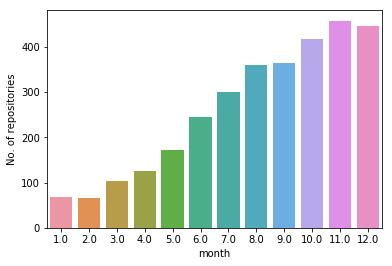

In [132]:
z=most_pop_months(2014)

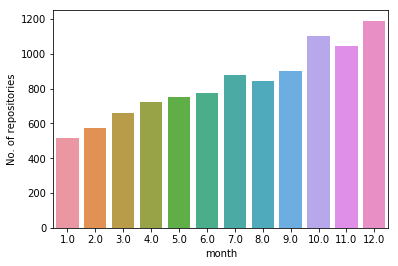

In [133]:
z=most_pop_months(2015)

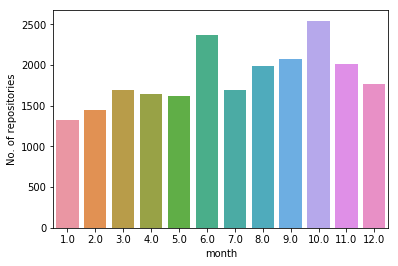

In [134]:
z=most_pop_months(2016)

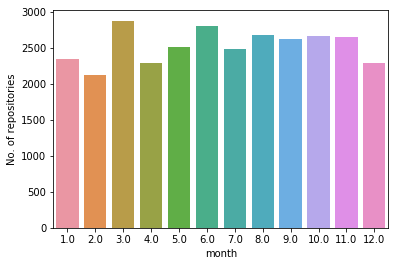

In [135]:
z=most_pop_months(2017)

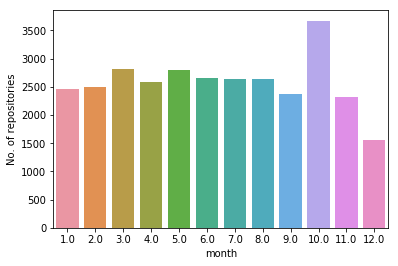

In [136]:
z=most_pop_months(2018)

During 2014 and 2015 we see an increase in number of repositories every month. This is most probably due to the growth of the platform itself.
October seems to be the most popular month for new content and this can be seen from 2014-2018

### Find which months were popular by number of pulls

In [139]:
def pull_by_month(yy,mm):
    dfx=df[df['year']==yy]
    dfx=dfx[dfx['month']==mm].sort_values(by='pull_count',ascending=False)
    return dfx

In [140]:
pull_by_month(2016,5)

,architectures,categories,certification_status,created_at,filter_type,id,name,operating_systems,popularity,publisher,pull_count,short_description,slug,source,star_count,type,updated_at,month,year
44944,x86-64,None,False,2016-05-18 19:47:41.939412+00:00,community,,jive/postal,"Linux,",0,jive,9.9K,,jive/postal,community,0,image,2017-11-07 22:11:34.960412,5.0,2016.0
44947,x86-64,None,False,2016-05-07 16:11:54.620818+00:00,community,,suamn/gs-rest-service,,0,suamn,9.9K,,suamn/gs-rest-service,community,0,image,2016-05-11 00:00:46.550440,5.0,2016.0
45086,x86-64,None,False,2016-05-19 23:01:25.744749+00:00,community,,jcrugzz/alpine-node-kubernetes,", Linux",0,jcrugzz,9.9K,,jcrugzz/alpine-node-kubernetes,community,1,image,2019-01-17 15:22:01.083230,5.0,2016.0
45118,,None,False,2016-05-15 21:29:37.451389+00:00,community,,husseingalal/nginx-curl,,0,husseingalal,9.9K,,husseingalal/nginx-curl,community,0,image,2016-05-15 21:29:37.846764,5.0,2016.0
45133,x86-64,None,False,2016-05-05 09:29:06.923317+00:00,community,,vcatechnology/debian,Linux,0,vcatechnology,9.8K,A Debian image that is updated daily,vcatechnology/debian,community,0,image,2018-06-23 00:26:16.701173,5.0,2016.0
45172,x86-64,None,False,2016-05-25 09:08:34.037112+00:00,community,,hiptest/hiptest-publisher,", Linux",0,hiptest,9.8K,Publish your Hiptest projects to any language,hiptest/hiptest-publisher,community,0,image,2019-01-28 11:00:32.616211,5.0,2016.0
45173,x86-64,None,False,2016-05-13 20:47:05.383355+00:00,community,,goern/redis-28-centos7,,0,goern,9.8K,,goern/redis-28-centos7,community,1,image,2016-05-14 20:00:50.208577,5.0,2016.0
45189,x86-64,None,False,2016-05-04 10:53:15.068111+00:00,community,,flozano/kafka,Linux,0,flozano,9.8K,"Docker images for development, with embedded z...",flozano/kafka,community,4,image,2019-02-12 12:48:06.812856,5.0,2016.0
45212,x86-64,None,False,2016-05-19 22:53:06.560341+00:00,community,,relateiq/zookeeper,,0,relateiq,9.8K,Dev zookeeper,relateiq/zookeeper,community,0,image,2016-05-21 06:27:32.807328,5.0,2016.0
45222,x86-64,None,False,2016-05-26 07:39:06.440938+00:00,community,,upbeta01/centos-php-nginx,", Linux",0,upbeta01,9.8K,**Just another webserver image**,upbeta01/centos-php-nginx,community,1,image,2016-06-08 10:26:00.873988,5.0,2016.0
